In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from dash import Dash, dcc, html


In [5]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\Domestic violence.csv')
df

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes
...,...,...,...,...,...,...,...
342,343,27,tertiary,semi employed,30000,unmarred,no
343,344,26,tertiary,employed,35000,married,no
344,345,27,primary,unemployed,0,married,yes
345,346,29,primary,unemployed,0,married,no


In [17]:
df.columns=df.columns.str.strip()
df

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0.0,married,yes
1,2,47,tertiary,unemployed,0.0,married,no
2,3,24,tertiary,unemployed,0.0,unmarred,no
3,4,22,tertiary,unemployed,0.0,unmarred,no
4,5,50,primary,unemployed,0.0,married,yes
...,...,...,...,...,...,...,...
342,343,27,tertiary,semi employed,30000.0,unmarred,no
343,344,26,tertiary,employed,35000.0,married,no
344,345,27,primary,unemployed,0.0,married,yes
345,346,29,primary,unemployed,0.0,married,no


# age and income distribution

In [6]:
df['Income']=df['Income'].astype(float)

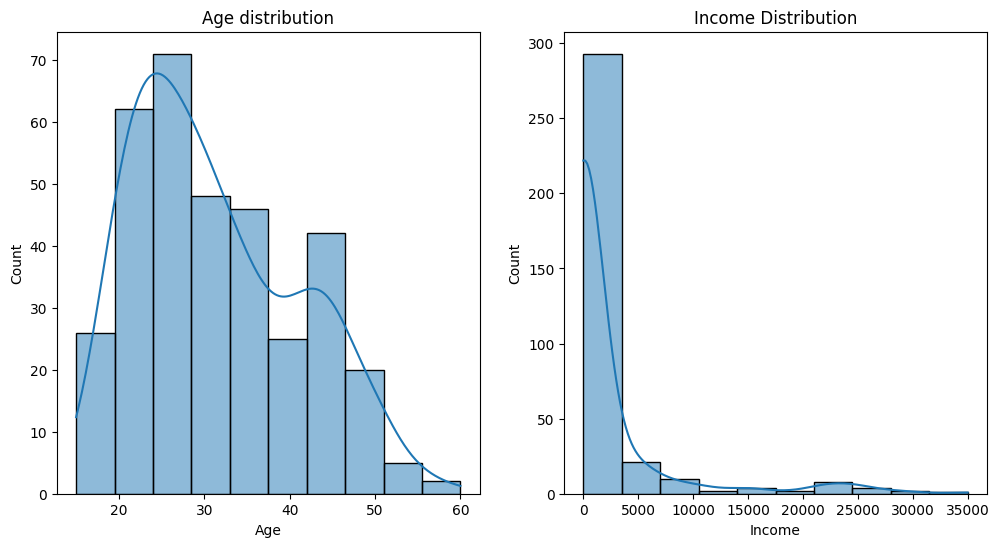

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(df['Age'], kde = True)
plt.title('Age distribution')

plt.subplot(1,2,2)
sns.histplot(df['Income'], kde = True)
plt.title('Income Distribution')

plt.show()

In [21]:
df.columns

Index(['SL. No', 'Age', 'Education', 'Employment', 'Income', 'Marital status',
       'Violence'],
      dtype='object')

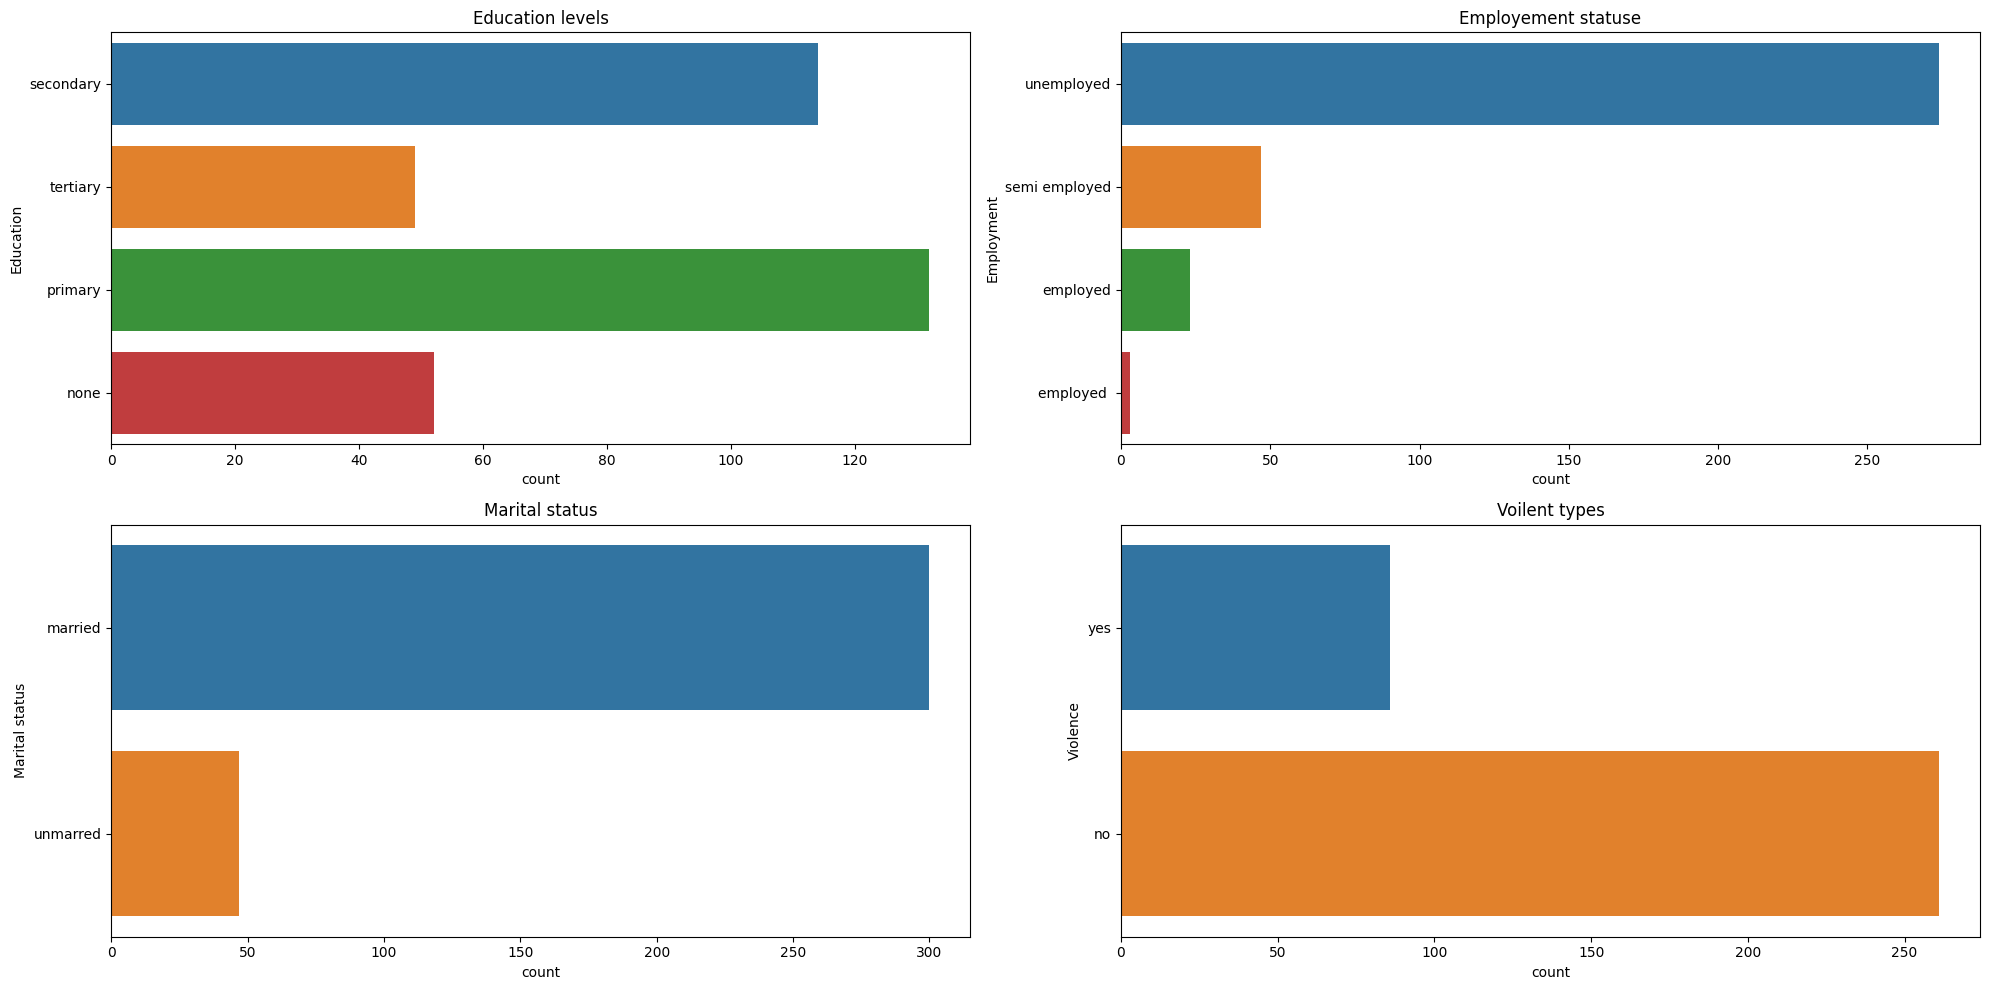

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(y = df['Education'])
plt.title('Education levels')

plt.subplot(2,2,2)
sns.countplot(y = df['Employment'])
plt.title('Employement statuse')

plt.subplot(2,2,3)
sns.countplot(y = df['Marital status'])
plt.title('Marital status')

plt.subplot(2,2,4)
sns.countplot(y = df['Violence'])
plt.title('Voilent types')

plt.tight_layout()
plt.show()

# Correlation analysis for numeric attributes

Text(0.5, 1.0, 'Correlation matrix')

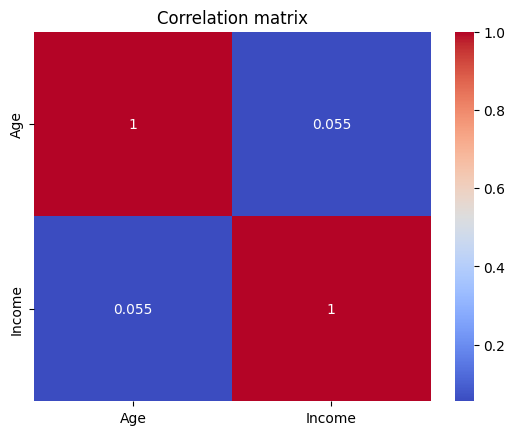

In [31]:
corr=df[['Age','Income']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')

## Feature Engineering

In [45]:
## Age group and violence
df['Age group']=pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '18-35', '35-50', '50-65', '65+'])


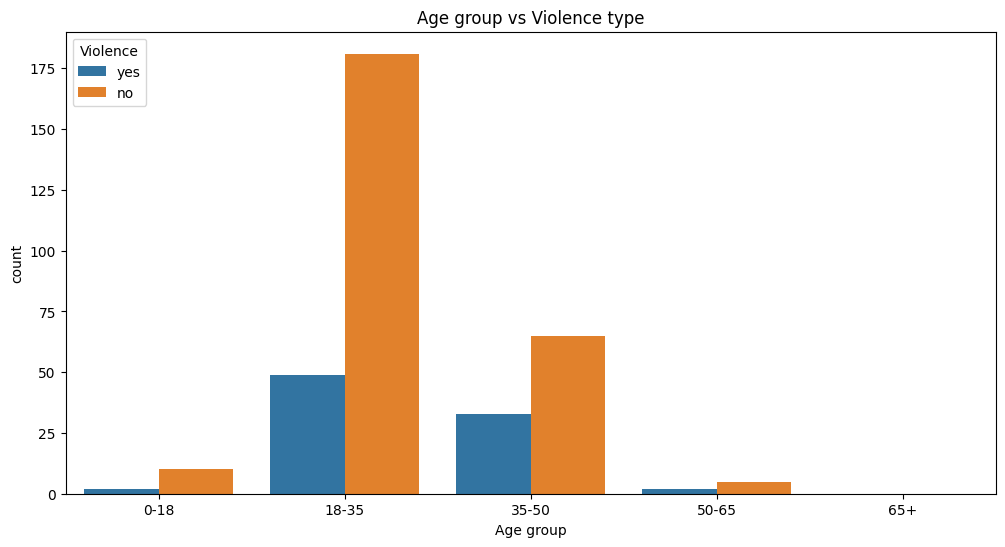

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'Age group', hue= 'Violence', data=df)
plt.title('Age group vs Violence type')
plt.show()

## Income and Violence type 

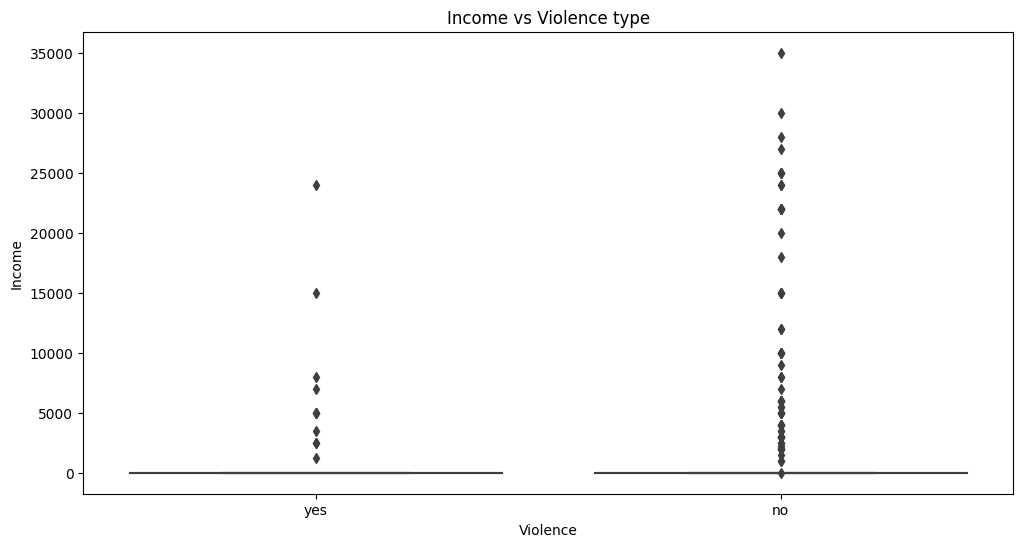

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x= 'Violence', y= 'Income', data=df)
plt.title('Income vs Violence type')
plt.show()

## Education levels and Violence type

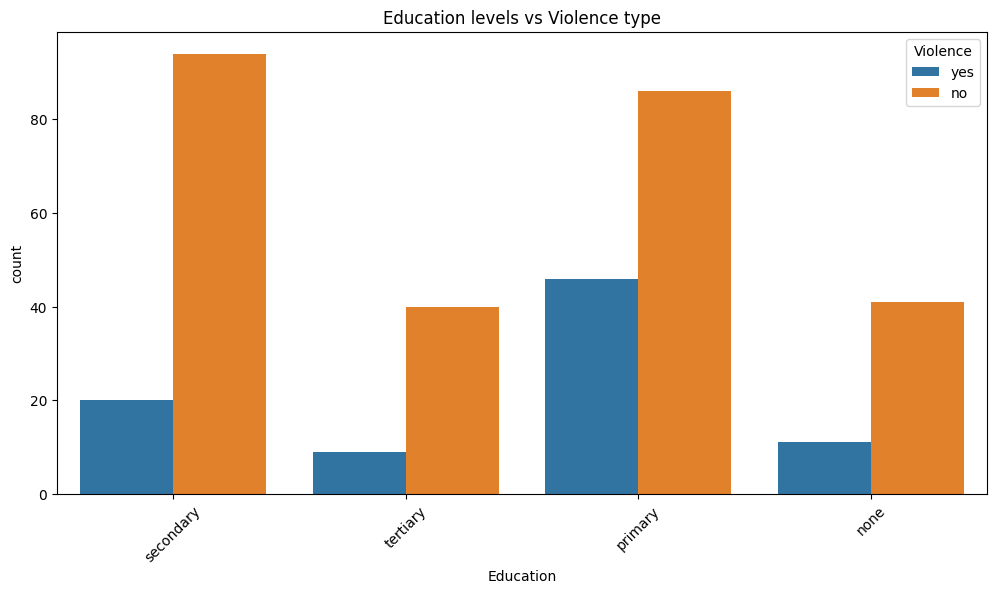

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'Education', hue= 'Violence', data= df)
plt.title('Education levels vs Violence type')

plt.xticks(rotation=45)
plt.show()

## Creating Dashboar using dash

In [48]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Domestic Violence Data Dashboard"),

    dcc.Graph(
        id='age-violence',
        figure=px.histogram(df, x='Age group', color='Violence', barmode='group',
                            title='Age Group vs Violence Type')
    ),

    dcc.Graph(
        id='income-violence',
        figure=px.box(df, x='Violence', y='Income', points='all',
                      title='Income vs Violence Type')
    ),

    dcc.Graph(
        id='education-violence',
        figure=px.histogram(df, x='Education', color='Violence', barmode='group',
                            title='Education Level vs Violence Type')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)
